In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import copy, deepcopy
%matplotlib inline

In [2]:
nb_gen = 300
nb_pop = 50
mutation_rate = 0.001

In [3]:
def init_grid():
    map = np.zeros((4,4))
    add_bloc(map)
    add_bloc(map)
    return map

In [4]:
def add_bloc(map):
    nb = np.count_nonzero(map == 0)
    temp = random.random()
    if nb != 0 :
        rdx = random.randint(0,3)
        rdy = random.randint(0,3)
        while map[rdx][rdy] != 0:
            rdx = random.randint(0,3)
            rdy = random.randint(0,3)
        if temp >0.70 :
            map[rdx][rdy] = 4
        else :
            map[rdx][rdy] = 2

In [5]:
def is_over(map):
    if np.count_nonzero(map == 0):
        return 0
    for i in range(0,3):
        for j in range(0,3):
            if map[i][j] == map[i][j+1] or map[i][j] == map[i+1][j] :
                return 0
    return 1

In [6]:
def move_to(key, map):
    score_added = 0
    if key == 0:
        #print("moving up")
        map = map.transpose()
        map = np.fliplr(map)
        score_added = move_to(3,map)
        map = map.transpose()
        map = np.fliplr(map)
    elif key == 1:
        #print("moving down")
        map = map.transpose()
        score_added = move_to(3,map)
        map = map.transpose()
    elif key == 2:
        #print("moving left")
        map = np.fliplr(map)
        score_added = move_to(3,map)
        map = np.fliplr(map)
    elif key == 3:
        #print("moving right")
        for i in range(0,4):
            nb =np.count_nonzero(map[i] == 0)
            a = np.zeros(nb)
            b = np.zeros(4-nb)
            k = 0
            for element in map[i]:
                if element !=0:
                    b[k] = element
                    k+=1
            map[i] = np.concatenate((a,b))
            for j in range(0,3):
                if not(map[i][j] == map[i][j+1] and map[i][j+1] !=0):
                    continue
                else :
                    #print("là ça ajoute")
                    map[i][j+1] = 2*map[i][j+1]
                    map[i][0:j+1] = np.roll(map[i][0:j+1],1)
                    map[i][0] = 0
                    score_added += 2*map[i][j+1]
                    #print(i,j+1)
    return score_added

In [17]:
def normalize(grid):
    maxi = np.max(grid)
    return grid/maxi
    
    
    
    

In [18]:
class Bot : 
    def __init__(self):
        self.A = np.random.random((3,16))
        self.B = np.random.random((3,3))
        self.C= np.random.random((3,4))
        self.last_fitness = 0

    def make_decision(self,grid):
        map_vect = np.reshape(grid,16)
        output = self.A.dot(map_vect).dot(self.B).dot(self.C)
        i = np.argmax(output)
        grid_copy = deepcopy(grid)
        move_to(i , grid_copy)
        #print(output)
        while (grid_copy == grid).all():
            ##if np.array_equal(grid_copy, grid):
            #print("useless move")
            i = random.randint(0,3)
            grid_copy = deepcopy(grid)
            move_to(i , grid_copy)
            #print(i)
            #print(grid)
        #print("got out")
        return i 


    def run_neural_network(self):
        score = 0
        nb_coups = 0
        grid = init_grid()
        #print(grid)
        for i in range(10):
            nb_coups = 0
            grid = init_grid()
            while (not is_over(grid) and nb_coups <=500):
                normalized_grid = copy(grid)
                normalized_grid = normalize(normalized_grid)
                key = self.make_decision(normalized_grid)
                #print("key selected :                "+str(key))
                score += move_to(key,grid)
                add_bloc(grid)
                #print(grid)
                nb_coups += 1
                #print("score : "+str(score))
                #print("next")
        return nb_coups
    
    def evaluate(self):
        self.fitness = self.run_neural_network()
        
    def mutate(self):
        child = Bot()
        child.A = copy(self.A)
        child.B = copy(self.B)
        child.C = copy(self.C)
        for i in child.A:
            if random.random() < mutation_rate:
                i = random.random()
        for i in child.B:
            if random.random() < mutation_rate:
                i = random.random()
        for i in child.C:
            if random.random() < mutation_rate:
                i = random.random()
    
        return child


            


In [19]:
def one_plus_one(nb_gen,mutation_rate):
    fits = np.zeros(nb_gen)
    parent = Bot()
    parent.evaluate()
    
    for i in range(nb_gen):
        print("generation "+str(i))
        child = parent.mutate()
        child.evaluate()
        print("fitness :"+str(child.fitness))

        if child.fitness >= parent.fitness:
            print("il y a selection")
            parent = child
        fits[i] = parent.fitness
    print(fits)

In [20]:
def one_plus_one(nb_gen,mutation_rate):
    bots = []
    plt.figure()
    plt.show()
    
    for i in range(nb_pop):
        bots.append(Bot())
        bots[i].evaluate()
        #print(bots[i].fitness)
        
    
    fits = np.zeros((nb_gen,nb_pop))
    average_fits = np.zeros(nb_gen)
    
    print("Starting generating")
    bots = sorted(bots, key=lambda bot: bot.fitness, reverse = True)
    for i in range(nb_gen):
        
        for j in range(15,30):
            bots[j] = bots[j-3].mutate()
            bots[j].evaluate()
            #print(bots[j].fitness)
        for j in range(30,50):
            bots[j] = Bot()
            bots[j].evaluate()
            #print(bots[j].fitness)
        for j in range(0,15):
            bots[j].evaluate()
        print("generation "+str(i))
        for j in range(nb_pop):
            fits[i][j] = bots[j].fitness
        print(fits[i])
        bots = sorted(bots, key=lambda bot: bot.fitness, reverse = True)
        print("La moyenne du fitness sur cette génération est "+str(np.mean(fits[i])))
        average_fits[i] = np.mean(fits[i])
        plt.plot(average_fits[:i+1])
        plt.show()
    
    
    print(fits)

Starting generating
generation 0
[108.  84.  98.  45. 103.  89.  76.  93.  84. 109.  79.  77.  97. 124.
  74.  70.  96.  24.  90.  81.  90.  53. 111.  72.  63. 120. 102. 105.
  76. 116. 101.  84.  82.  73.  62.  49.  52. 140. 129.  71.  82.  39.
 120. 141. 101.  64. 103.  56.  69. 109.]
La moyenne du fitness sur cette génération est 86.72


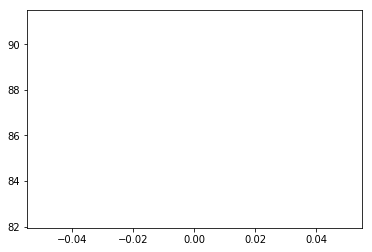

generation 1
[ 53. 126.  48.  52.  44.  94.  94. 179.  99. 105.  44. 128.  79.  56.
  94. 145.  78.  95. 118.  53.  69. 107.  67. 103.  88. 165. 114. 117.
  84.  49. 180. 109.  63.  98.  77. 102.  63.  98.  54. 119. 114.  95.
  43.  44.  50.  95.  49.  73.  72.  66.]
La moyenne du fitness sur cette génération est 88.22


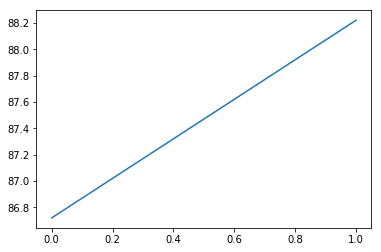

generation 2
[ 70. 103. 125. 115. 102.  74. 112. 115.  61.  50. 109. 126. 147.  50.
 133.  51.  62.  70. 101.  84.  69.  83.  41.  68. 104.  90.  78.  68.
 130.  99. 117.  77.  84.  95.  55. 109.  73. 138. 163. 108.  81.  92.
 101.  75.  75. 155.  61.  62.  61.  85.]
La moyenne du fitness sur cette génération est 91.14


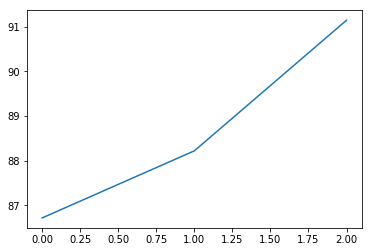

generation 3
[ 84.  67. 103. 138. 120.  62. 127.  61.  67.  80.  82.  92.  70.  55.
  63.  83.  49.  72.  61. 156.  86.  73.  73. 111. 102.  40.  92.  50.
  66. 125.  74. 114.  99.  60. 120.  64.  43.  55.  53. 102.  77.  70.
  84.  99.  64.  57.  79.  61.  59.  66.]
La moyenne du fitness sur cette génération est 80.2


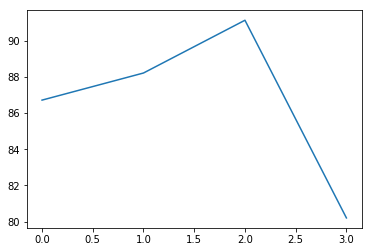

generation 4
[124.  85.  88. 136.  45. 153.  44.  61.  47.  66. 117. 112.  83. 123.
 135.  94.  63.  32.  85.  82. 122. 155.  46.  42. 118.  55.  67.  76.
  66. 140.  92. 116. 127. 156.  69. 125. 115. 113. 104. 114.  61.  54.
 131.  51.  90.  59.  81.  56. 108.  47.]
La moyenne du fitness sur cette génération est 90.62


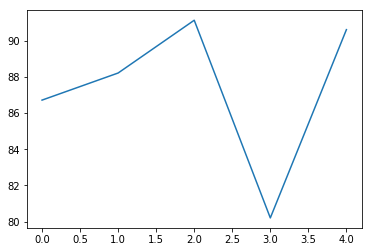

generation 5
[122.  81. 129. 148.  94.  80. 108.  80. 110. 104.  83.  89.  48.  61.
 127.  47.  87.  83. 111.  85.  66. 118.  98. 116. 192. 110. 139.  60.
 120.  89.  65. 121.  46.  53.  62.  70.  77.  69. 125.  64.  72.  96.
  79.  47.  67.  82.  61.  57.  89.  87.]
La moyenne du fitness sur cette génération est 89.48


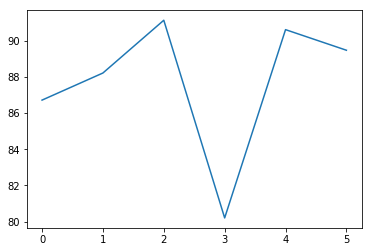

generation 6
[109.  76.  97.  92. 132.  56. 104. 143. 128.  40. 105.  65. 104. 128.
  90.  61.  86.  95.  47.  28.  81.  67. 145.  73. 142.  53. 107.  58.
  60. 101. 104.  37. 121. 107.  60. 128. 118. 133.  92.  68. 119. 103.
  98.  79.  73. 110.  74. 134.  67.  64.]
La moyenne du fitness sur cette génération est 91.24


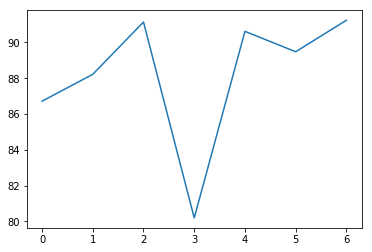

generation 7
[ 98. 110.  88.  63.  60. 127. 134.  94.  71.  56.  86.  88. 133.  55.
  96.  51.  75.  80. 128.  87.  77.  45.  86. 101.  53.  83. 111.  92.
 187. 115.  78.  68.  69.  54.  48.  20.  63. 126.  64.  47.  85.  95.
 109.  67.  77.  33.  92.  52. 114.  74.]
La moyenne du fitness sur cette génération est 83.3


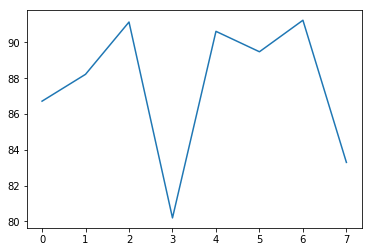

generation 8
[ 57. 105.  63.  60.  42.  89.  47.  70.  61. 150.  76. 129.  82. 120.
  44.  52. 102.  57.  82.  85. 122. 139.  55.  85. 102.  69.  34.  76.
  78. 121.  69. 102.  68.  74.  72.  71.  59. 110. 126.  92.  61.  66.
  88. 133. 117. 103.  61. 110.  45.  56.]
La moyenne du fitness sur cette génération est 82.74


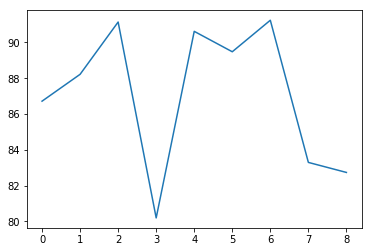

generation 9
[ 83. 111. 133.  41.  62. 225. 175.  89.  69.  86.  84.  88.  72.  78.
  39. 109. 192.  76.  72.  97.  88.  75.  99.  49.  39.  76.  99.  81.
  95.  76.  94. 116.  68.  33.  84.  71.  71.  65.  97. 194.  61.  68.
 116.  51. 145.  81.  40. 171. 103.  83.]
La moyenne du fitness sur cette génération est 91.4


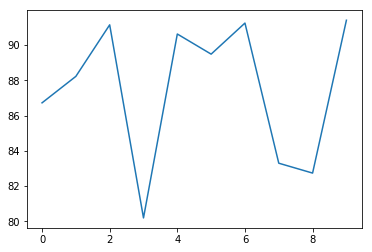

generation 10
[ 65.  91. 122.  79.  68.  69. 151.  83. 102. 119.  89.  89.  79. 218.
  93.  93.  61. 151. 127.  55.  69. 125.  57. 101. 124. 122.  78.  76.
  97. 142. 105.  73. 126. 122.  93. 120.  99.  91.  48.  78. 112.  57.
  77. 103.  71.  65.  84. 104.  64.  86.]
La moyenne du fitness sur cette génération est 95.46


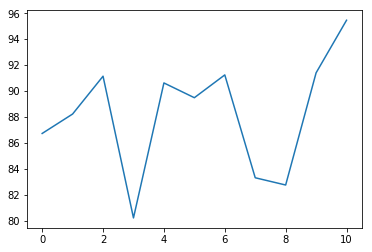

generation 11
[143.  98.  81.  54.  65. 100. 100.  48.  75.  33. 100.  65.  63.  77.
  68. 120.  79. 123.  75.  52.  79. 146.  75.  77. 126.  80.  55.  55.
  41.  45. 128. 109. 106. 136. 131.  49.  70.  57.  63.  54.  62.  84.
  49.  62.  68.  70.  61.  85.  60.  84.]
La moyenne du fitness sur cette génération est 79.72


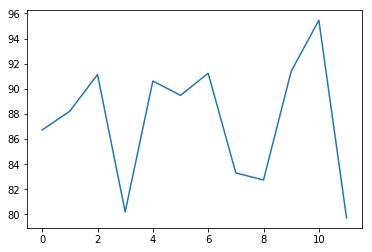

generation 12
[ 58. 112. 114.  88.  73. 105.  52.  70. 145. 158.  91.  67. 101.  60.
  63. 111. 119. 112.  43. 109. 104.  80.  92.  80.  78.  36. 111.  76.
  42. 136.  84.  54.  68.  47.  70.  66. 118.  89.  87.  49.  90. 104.
  82.  79.  67.  80.  91.  43.  70.  87.]
La moyenne du fitness sur cette génération est 84.22


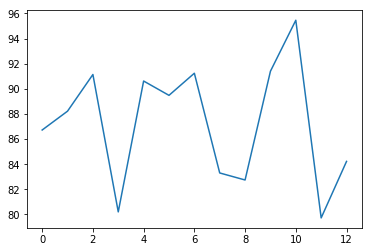

generation 13
[ 40. 145.  57.  76.  69.  50.  77.  68.  54. 121.  96.  79. 130. 128.
 144.  82.  49.  65.  71. 103.  83.  80.  79.  32. 101. 117. 120.  54.
  66.  86.  88.  76. 103. 114.  83.  52.  76. 117.  69.  63.  95.  71.
 127.  71. 106.  75.  74.  52. 110.  58.]
La moyenne du fitness sur cette génération est 84.04


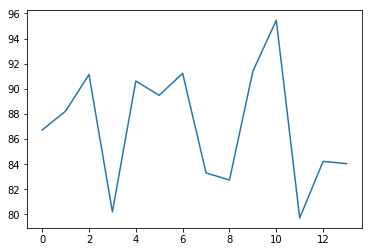

generation 14
[ 61.  36.  92.  62. 103.  89.  65. 116. 102.  41.  79.  70. 132. 147.
  67.  91.  78. 111. 114.  84.  97.  54.  66.  73.  51. 129.  68.  73.
  66.  57. 142.  34.  44.  87. 112. 111.  59.  88.  47.  73. 107.  38.
  51. 146.  82. 136.  88.  97. 105.  80.]
La moyenne du fitness sur cette génération est 84.02


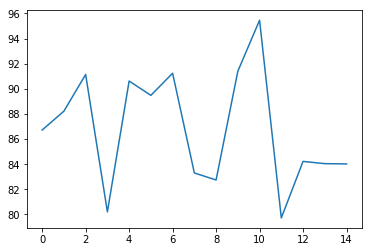

generation 15
[ 83.  36. 114.  57.  91. 117. 100.  48.  53. 107.  58.  74.  74.  79.
  89.  74.  71. 159.  66. 149. 103. 122. 101.  69. 117.  32. 106.  81.
  69.  81.  34.  60.  95.  54.  34.  46.  80.  68. 100. 113.  94. 107.
  62.  89.  73.  96.  87. 103.  97.  78.]
La moyenne du fitness sur cette génération est 83.0


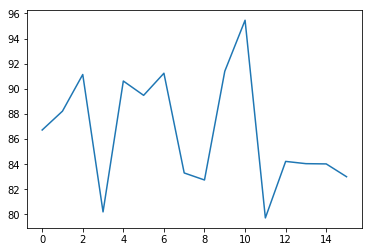

generation 16
[121. 142.  82. 153. 135. 100. 115.  53.  56. 165.  73.  88.  51.  63.
  90.  80.  77.  64. 119.  46.  85. 102.  41.  54. 125. 100.  29. 118.
 120. 120.  69.  99.  88.  40. 106.  61.  73.  71. 120.  57. 197.  96.
  86. 124.  95.  67.  52. 109. 102.  78.]
La moyenne du fitness sur cette génération est 91.14


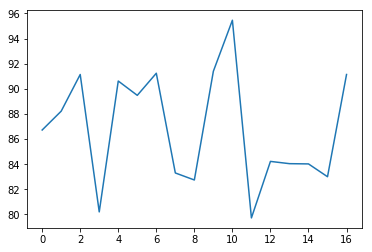

generation 17
[ 63.  72.  49. 106. 123.  86. 106. 133.  63.  66.  79.  77.  97.  55.
  58. 137.  35.  79. 138.  49.  79.  67.  42.  81.  92.  61. 121. 111.
  70.  49.  90.  86.  99.  40.  67. 131.  63.  95. 118.  84.  76.  76.
  70.  58.  57. 108.  66. 109.  57.  72.]
La moyenne du fitness sur cette génération est 81.32


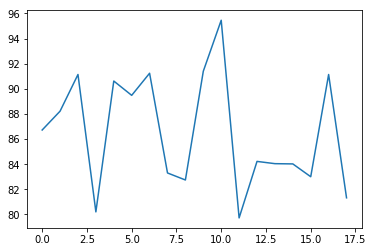

generation 18
[115. 100.  72. 100.  78. 116.  99. 108. 131.  80.  97.  99.  42. 131.
 128. 104.  61.  46.  54. 132.  64.  95.  70. 117.  36.  85.  53.  97.
  93. 109.  52.  79.  78. 110.  72.  38.  53.  96.  61. 112.  81. 133.
  50.  43.  72.  99. 173.  59. 210. 128.]
La moyenne du fitness sur cette génération est 90.22


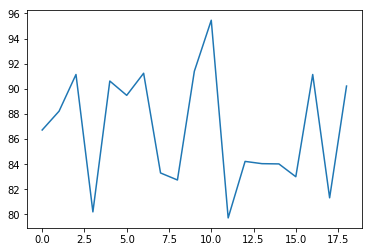

generation 19
[119.  64.  75.  59.  67. 100.  80.  62. 138. 107. 109.  92.  91.  95.
  43. 101.  74. 117. 113.  83. 107. 130.  96.  76.  71.  62.  65.  82.
  37.  82.  73.  60.  54.  47.  63. 121. 118.  49.  98.  76.  70. 127.
 107.  83.  70. 116. 163. 127.  57.  57.]
La moyenne du fitness sur cette génération est 86.66


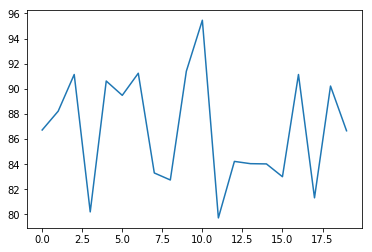

generation 20
[ 62. 174.  52. 126.  46.  69.  91.  96.  54. 107.  92.  44.  79.  92.
  98.  93.  59.  98.  47.  74.  77.  78.  66. 103.  64.  97.  93. 142.
  47.  55. 116.  67.  60.  93. 158.  41.  85.  86.  71.  95.  79.  92.
  72.  39. 103.  84. 105. 111.  73.  40.]
La moyenne du fitness sur cette génération est 82.9


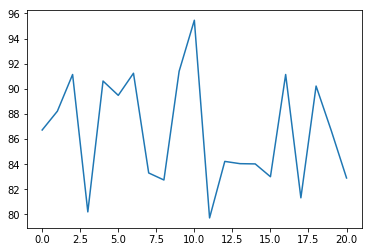

generation 21
[ 63. 200.  96.  91.  55. 151.  68. 114.  83.  82. 106. 120.  70.  61.
  66. 139.  59.  49.  52.  97.  93.  40.  35.  60.  64.  77.  94.  93.
 100.  84.  58. 113.  93.  73.  54.  41.  71.  99.  74.  84.  94.  99.
  99.  68. 116.  75.  63.  46.  60.  83.]
La moyenne du fitness sur cette génération est 82.5


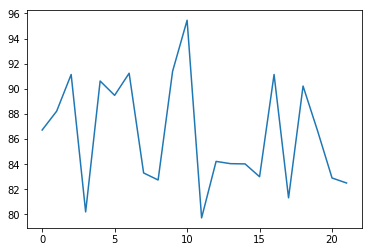

generation 22
[116. 100.  59.  76. 122. 132. 134. 136.  79. 109. 123.  76.  69. 106.
 122.  62. 103.  75. 103.  71.  41.  68. 114.  67.  62. 110. 137.  83.
  44. 132.  54.  53.  38.  60. 109. 113.  92. 200.  86. 115.  94.  69.
  68.  58.  86.  59. 100. 111. 117. 111.]
La moyenne du fitness sur cette génération est 92.48


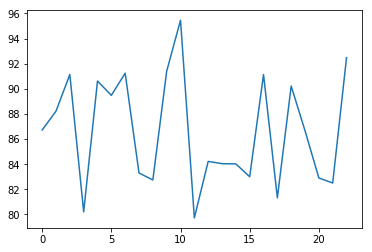

generation 23
[ 84.  68. 126. 135. 136. 141.  98.  98.  57. 137.  86. 104.  64.  97.
 101.  66. 127.  79.  99.  89.  89.  60.  76.  89.  77. 113. 102.  47.
  98.  60.  58.  81.  97.  66. 137.  98. 149.  57. 114. 130. 118.  50.
  38.  45.  59.  89.  59.  59.  76.  64.]
La moyenne du fitness sur cette génération est 88.94


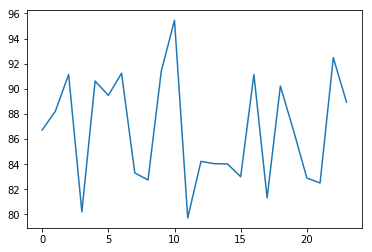

generation 24
[ 69.  52.  84.  63.  94.  80.  67.  62.  75.  64. 109. 112.  39. 137.
  74.  29.  67.  44.  66.  67. 117.  99.  79. 104.  77.  53. 111.  32.
  67.  50.  93.  87.  47.  86.  70.  45. 115.  72.  63.  96.  49.  69.
  56.  99.  77.  68.  80.  74.  64.  56.]
La moyenne du fitness sur cette génération est 74.18


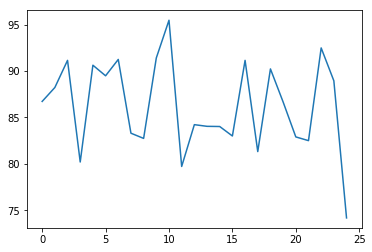

generation 25
[ 79.  85.  71.  94.  60. 114.  74.  51.  44.  66.  92. 123.  50.  51.
  78.  66. 122. 106.  76. 107.  53. 118.  67.  97. 100.  58.  66.  80.
  46.  58.  66.  86. 116. 106.  39.  92.  94.  57.  93.  77.  89.  93.
 125.  56.  59.  73. 116. 139.  43.  76.]
La moyenne du fitness sur cette génération est 80.94


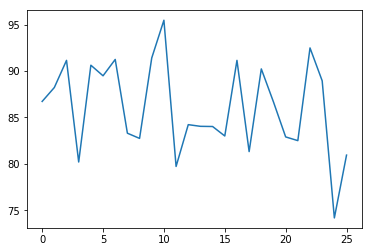

generation 26
[ 56.  92.  75. 122.  98.  98.  81.  49. 116.  68. 103.  74. 106.  57.
 180. 113. 127.  98. 120.  97.  60. 122.  81. 108.  90.  71.  79.  70.
  89.  68. 108. 127.  73.  97.  54.  73. 121.  98.  77.  67.  84. 121.
  44.  75.  56. 114. 113.  64.  82.  76.]
La moyenne du fitness sur cette génération est 89.84


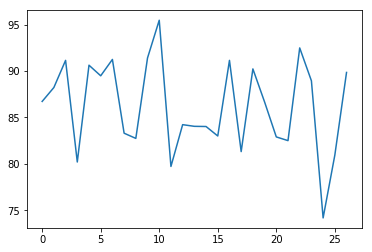

generation 27
[ 53.  74. 100.  56.  73.  59.  97.  92.  58.  80. 104.  76.  76.  59.
  32.  97. 144.  50.  80.  72. 109. 134. 175.  62.  79. 127.  71.  70.
 104.  77.  75.  87.  44.  74. 117.  56.  69.  66. 103. 112.  98.  70.
  75.  37.  68.  47.  85.  53. 126.  68.]
La moyenne du fitness sur cette génération est 81.4


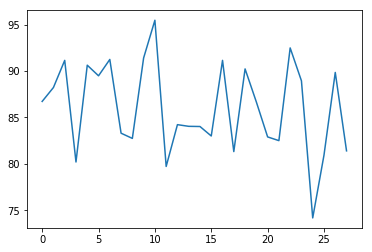

generation 28
[112.  91.  70.  70. 110.  57.  87. 112.  85.  82.  67.  73. 181.  93.
  98. 103.  92.  79.  86.  32.  87. 125.  50.  67. 159.  54.  91.  74.
  96. 124. 126. 109. 103.  64.  82.  42.  96. 166. 164.  75.  86.  83.
  58.  95. 145.  80. 100.  31. 119.  96.]
La moyenne du fitness sur cette génération est 92.54


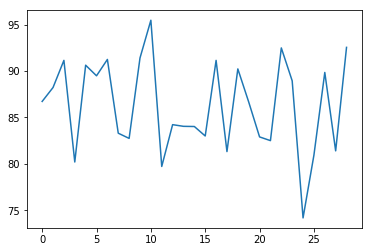

generation 29
[ 64. 100. 179.  66.  95.  55.  61.  99.  97.  98. 109.  64.  25. 209.
 118.  95. 127.  29.  81.  84.  82.  55. 117. 124.  62.  50. 122.  37.
  88. 126. 101. 111.  96.  77.  76.  94. 156.  63.  66.  51. 122.  60.
  94.  64.  76. 129.  63. 182.  69.  64.]
La moyenne du fitness sur cette génération est 90.64


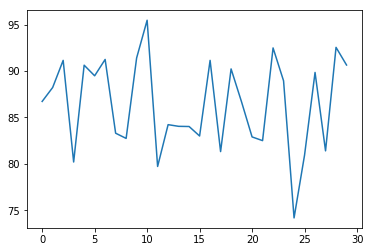

generation 30
[ 55.  88.  93. 187.  79.  85.  50.  47. 109.  95.  70. 124.  51.  63.
  74. 104.  90. 135.  96. 102.  62.  88.  79.  82.  85.  59. 116.  58.
  75.  66. 122.  81.  60. 106.  55. 103.  71. 141.  87. 136.  99.  71.
  99.  44.  97. 128. 166.  85.  81.  90.]
La moyenne du fitness sur cette génération est 89.78


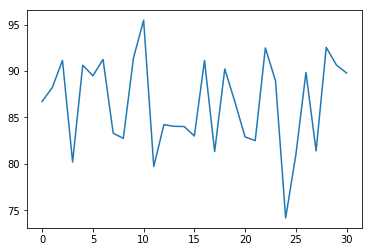

generation 31
[ 94.  50. 110.  47.  69. 105. 101. 109.  75.  70.  48.  78. 109.  83.
  57. 103.  98.  48.  55. 101. 112.  84.  81.  67. 117.  71. 100. 126.
  79.  79.  66.  96.  73.  55.  53.  95.  78.  92.  69. 130.  58. 121.
  44.  49.  45. 104.  88. 123.  73.  46.]
La moyenne du fitness sur cette génération est 81.68


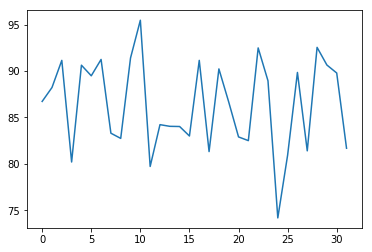

generation 32
[ 65. 118. 149.  65. 110.  60.  53. 124.  66.  73.  50. 115.  54.  41.
  69.  81.  67.  35.  79. 104.  56.  57.  78.  78.  98.  93.  45.  61.
  57. 137. 101. 121.  64.  64. 103.  63.  67.  34. 117.  68.  63.  81.
 115.  71.  69.  57. 135.  92.  71.  38.]
La moyenne du fitness sur cette génération est 78.64


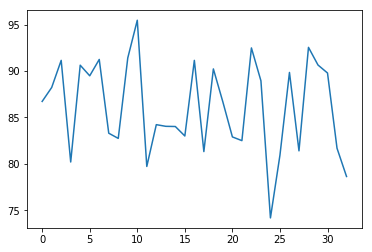

generation 33
[143.  60. 139.  81.  55.  77.  95. 100. 122.  54.  86. 109.  85.  63.
  60.  65. 128. 157.  54. 201. 129. 100. 144.  51.  36. 120.  65.  54.
 101.  85.  71. 145.  92. 124.  97. 106. 106.  83.  61.  41.  84.  45.
 110.  76. 162. 125.  73.  44.  79.  83.]
La moyenne du fitness sur cette génération est 92.52


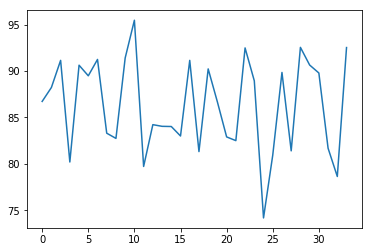

generation 34
[ 66.  68.  67. 111.  46.  65.  91.  69.  38.  93.  97.  36.  90.  74.
 121.  74. 124. 115.  63.  57.  48. 134.  74.  72.  97.  46. 113.  56.
  54.  43.  56. 159. 114.  32.  64.  72. 141.  88.  90.  61.  83.  43.
  61.  55. 155.  63. 115.  70.  66.  78.]
La moyenne du fitness sur cette génération est 79.36


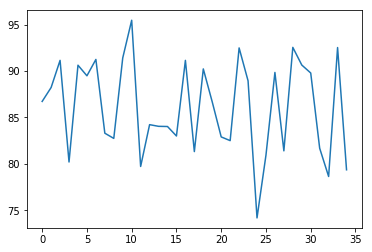

generation 35
[ 57.  84.  98.  81.  71.  81. 170.  76.  89.  48. 138. 188.  54.  81.
  47.  68. 117.  93. 125.  52.  61.  86.  61.  50. 115. 113.  65.  69.
  94.  69.  96.  92.  91. 103. 130.  70. 103.  76.  70.  47.  57.  38.
 107. 107.  73.  90. 125.  74. 101. 132.]
La moyenne du fitness sur cette génération est 87.66


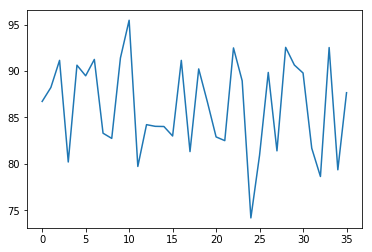

generation 36
[116. 120.  68. 128.  71.  71.  50.  56.  53.  90. 124.  70.  48.  51.
  74.  85. 100.  67. 163.  74.  38.  76.  87. 105.  79. 118.  80. 133.
  72. 107. 148.  75.  72.  62.  32. 102.  54.  60. 196.  90.  52.  88.
 121.  68. 108. 102. 122.  66.  42.  88.]
La moyenne du fitness sur cette génération est 86.44


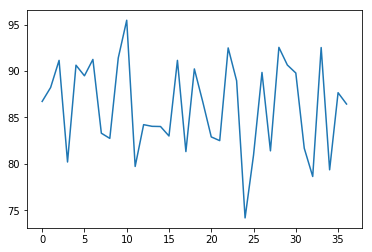

generation 37
[159.  38. 110.  98.  59. 112.  63.  70.  48.  99. 101. 115.  92.  59.
 107.  49. 114.  64.  87.  77. 106. 118.  94. 102. 137. 106.  96.  66.
  62.  80. 151. 117. 109.  73.  86. 112. 103.  56. 116.  39.  66. 112.
  72.  79.  53. 119.  75.  50.  71. 136.]
La moyenne du fitness sur cette génération est 89.66


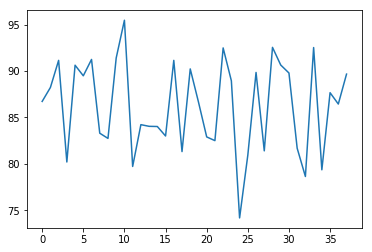

generation 38
[ 75.  71. 122.  64.  70.  65.  58.  77. 116.  90.  73.  66.  98. 105.
  53.  58.  83.  26.  66.  91.  88.  67. 119. 100.  92.  90.  87. 112.
 126. 121.  46. 131.  55.  76.  68.  75.  62. 104.  84. 119.  52.  71.
  61.  55. 107. 124. 104. 130.  48.  72.]
La moyenne du fitness sur cette génération est 83.46


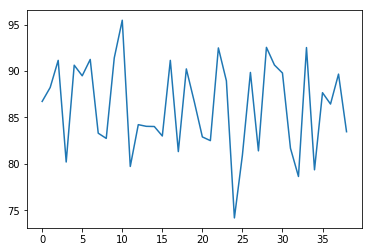

generation 39
[161.  99.  62. 131.  76.  74.  55.  69.  91.  60.  86.  75.  55. 107.
  71. 126.  96.  64. 140. 110.  85.  91.  87.  52. 103.  57.  34.  49.
  58.  72.  79. 126.  97.  72. 108. 109. 120.  59. 134.  95.  88.  89.
  66.  52.  79. 152.  61.  61. 119.  95.]
La moyenne du fitness sur cette génération est 87.14


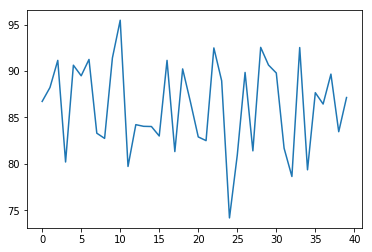

generation 40
[ 83.  73. 158.  73.  71.  76. 106.  51.  99. 130. 122. 125.  65.  54.
 158. 143.  82. 131. 126.  64. 176.  84. 113.  85.  83.  57. 177. 170.
  74.  75.  63. 123.  83. 106. 154.  56.  94. 143.  41.  68.  90. 124.
  66.  73.  45.  63.  77.  71. 132. 109.]
La moyenne du fitness sur cette génération est 97.3


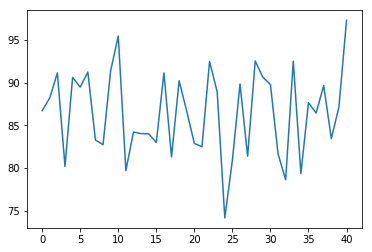

generation 41
[ 63. 105. 102.  75. 112.  57.  86.  51.  80. 112. 117. 132.  90. 119.
 107.  64.  78.  75.  48.  59.  40. 108.  53. 123. 102.  42.  89. 102.
  80.  80.  98. 114.  65.  84. 115.  77.  46.  56.  79. 135.  67.  91.
  64.  57. 114.  70. 135.  81.  79.  41.]
La moyenne du fitness sur cette génération est 84.38


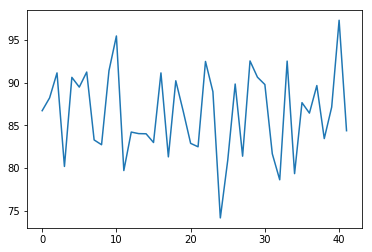

generation 42
[ 79.  75.  82. 124.  78.  92. 126. 139.  58.  79.  83.  66.  46. 121.
  75.  45.  76. 132.  70.  84. 106.  85. 108. 127.  63. 112.  59. 104.
  91.  70.  42. 103.  46. 110. 121.  93.  33.  92.  40. 162.  81.  80.
 100. 129.  41.  94.  75.  93.  97.  84.]
La moyenne du fitness sur cette génération est 87.42


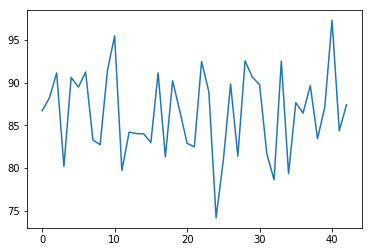

generation 43
[ 65. 141. 116. 125. 121.  79.  50.  57.  43.  81.  84. 112.  44.  84.
  77.  69.  96.  63.  74.  73.  64.  91.  88.  75.  84. 130.  86.  95.
  89. 126.  53. 151.  65.  30. 115. 111.  73.  62. 136.  65.  65.  99.
  64.  87. 127. 115.  65. 122.  65.  71.]
La moyenne du fitness sur cette génération est 86.46


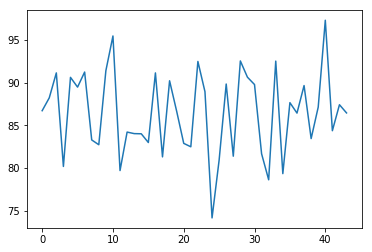

generation 44
[109. 169.  49.  62.  74. 129.  52. 121.  68. 118.  72.  86.  75.  53.
 114.  41.  59.  81.  76. 108.  24. 115.  95.  99. 107.  88.  54. 103.
  71.  86. 146.  39.  46. 125.  41. 123. 129.  68.  79. 117.  88.  63.
 119. 128.  83. 107.  44.  91. 112.  54.]
La moyenne du fitness sur cette génération est 87.2


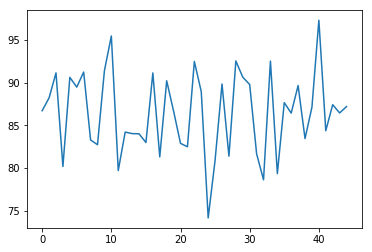

generation 45
[138.  67. 131. 119. 118.  57. 104.  48. 108. 116.  67. 145.  68. 111.
  64. 207.  84.  91.  56.  92. 104.  66.  62.  78.  80.  61.  40. 105.
  84. 113. 111.  67. 109. 142.  59.  73. 134. 104.  49.  45. 112.  58.
  90.  67.  73.  70.  71.  68. 109. 128.]
La moyenne du fitness sur cette génération est 90.46


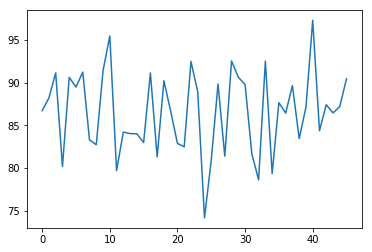

generation 46
[129.  76.  73. 115.  92. 121.  71. 128.  89. 110. 142.  51.  68.  68.
  27. 105. 103.  94.  85. 100.  93.  87.  60.  48. 128.  69.  72.  39.
  74. 114.  97.  64. 108. 121.  66. 127.  92.  84.  79.  76.  90.  66.
  45.  92. 100.  69. 154.  72.  76.  52.]
La moyenne du fitness sur cette génération est 87.22


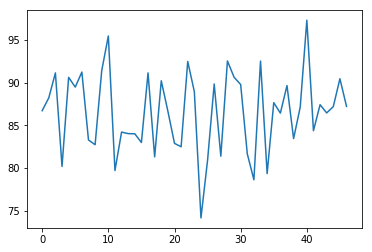

generation 47
[ 64.  84.  58. 132.  50.  77.  25.  84.  42.  65.  94.  74.  66. 102.
  63. 137. 116.  78.  79.  75.  61.  66.  81.  59.  78.  66.  52. 107.
  63.  72. 102.  54.  58.  74.  88.  69.  61. 172. 124.  98. 119. 134.
 164.  72.  81.  77.  88.  95. 112.  54.]
La moyenne du fitness sur cette génération est 83.32


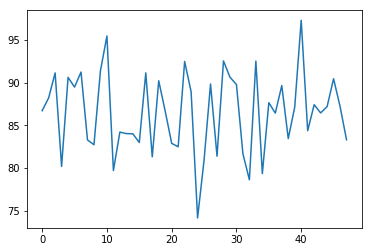

generation 48
[ 77.  65.  59.  73. 132.  85. 116.  80. 114.  88.  68. 120. 107.  38.
  59.  38. 123. 121. 155.  90.  41.  60.  96. 118.  89.  81.  79.  86.
 115.  81. 115.  34.  32. 113.  42.  70. 125.  67.  92. 183.  87.  72.
 130.  91.  65.  64. 115.  95. 125. 204.]
La moyenne du fitness sur cette génération est 91.5


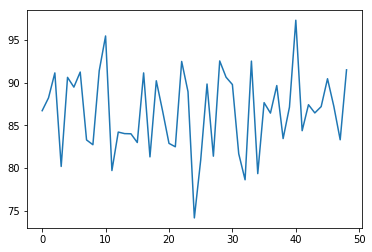

generation 49
[ 74. 101.  98.  48.  40. 128.  55.  75.  86.  95.  48. 128.  60.  50.
  44.  54.  52.  91. 100.  67.  69.  87. 122.  71.  65.  84. 110.  61.
 127.  55.  59.  54.  85.  76.  59. 130. 104.  69.  88.  71.  42. 125.
 108.  56. 119.  93.  96. 115. 107.  30.]
La moyenne du fitness sur cette génération est 80.62


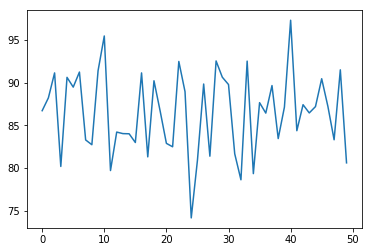

generation 50
[ 73.  49. 100.  32.  80.  48.  49.  83.  67. 132.  65.  72.  79.  81.
  60.  69.  69.  79.  34.  74.  83.  60.  36.  69.  61.  79.  51.  80.
  70. 126.  90.  51. 130.  46.  36.  46. 102.  90. 102. 102.  58.  53.
  66. 103.  63.  48. 101.  66. 115.  54.]
La moyenne du fitness sur cette génération est 72.64


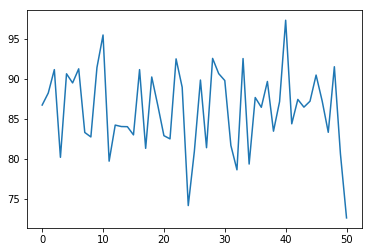

generation 51
[ 68.  45.  59.  81. 104. 101.  80. 107.  69.  37.  61.  68.  63.  96.
  83.  70.  57.  98. 103.  85. 104.  92.  82.  65.  64.  79. 100. 118.
  76.  45.  83. 127. 112.  86.  80.  82.  87. 131.  92.  64.  96.  78.
  74.  37.  69.  95. 116.  51.  59. 110.]
La moyenne du fitness sur cette génération est 81.78


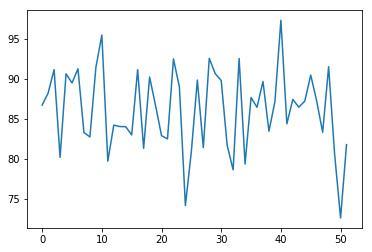

generation 52
[ 85. 123.  63.  44.  59.  67. 120. 153.  67.  63.  50.  69. 112.  86.
  98.  61.  61. 184.  84.  70.  60.  51.  50. 111.  47.  36. 121.  96.
  94.  56.  76. 113. 108.  82. 111.  64. 113.  50.  70. 133. 133. 111.
  85.  52. 115.  41.  87. 138.  67.  86.]
La moyenne du fitness sur cette génération est 85.52


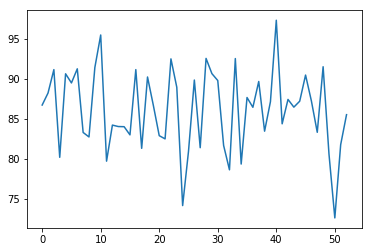

generation 53
[ 88.  97. 103.  54.  88.  86.  72.  65.  46.  37.  74.  76. 114. 127.
  49.  48.  85.  69. 107.  70.  80.  38. 137. 133.  74.  76. 109.  81.
  61.  81.  62. 135.  84.  81.  70.  72. 146. 109.  87.  84.  85.  79.
 118.  25. 137.  53.  51. 110.  42.  96.]
La moyenne du fitness sur cette génération est 83.02


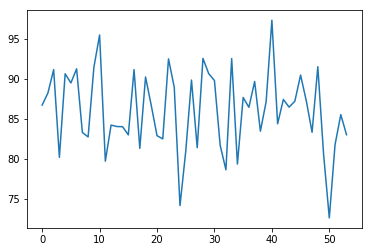

generation 54
[108.  49.  85. 120. 110.  84.  72.  68.  60. 119.  73.  67.  70.  57.
  60. 129.  64. 104.  93.  75.  75. 143.  66. 136.  85.  78.  33.  65.
 134.  74. 107.  85.  40.  31.  90. 115. 100.  69.  70.  63.  88.  74.
 110.  55. 129. 106.  75. 125.  73.  47.]
La moyenne du fitness sur cette génération est 84.16


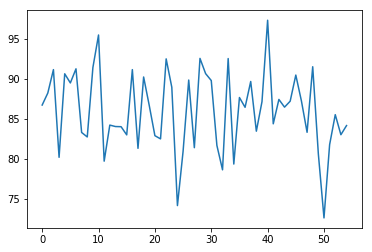

generation 55
[111.  45. 117.  88. 104. 116. 101.  42. 127.  77. 118.  55. 140. 106.
 109. 104.  86.  43.  88. 129.  61. 107.  51.  86.  63. 139.  71.  57.
  86.  68.  92.  98.  60. 111.  65. 100.  77.  68.  68.  94. 116.  60.
 116.  61.  95. 139.  77.  61.  76.  25.]
La moyenne du fitness sur cette génération est 87.08


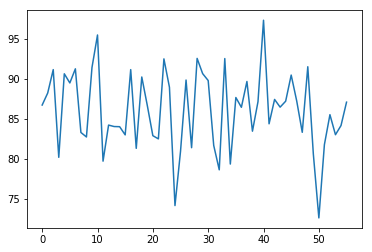

generation 56
[ 98.  77.  88.  83.  39.  42.  85. 105.  80.  79.  83.  82.  75. 162.
 127. 108.  40.  64.  45.  76.  46. 168. 147. 119.  83.  84.  78.  75.
 143.  78.  71.  66. 146.  82. 107.  77. 101. 114. 109.  79. 111.  70.
  76.  53. 103.  87.  61. 111.  56.  71.]
La moyenne du fitness sur cette génération est 88.2


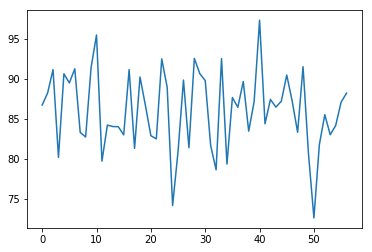

generation 57
[ 77. 149. 130.  70.  69.  71.  73.  74. 119.  76. 123. 114. 113.  82.
 103.  90.  95.  51.  86. 125.  97. 113.  75.  94.  38. 117. 121.  84.
  89.  82.  71.  74. 126.  40. 106.  71. 126.  83.  62.  65. 139.  66.
  62.  96. 162.  70.  52.  61. 103.  56.]
La moyenne du fitness sur cette génération est 89.82


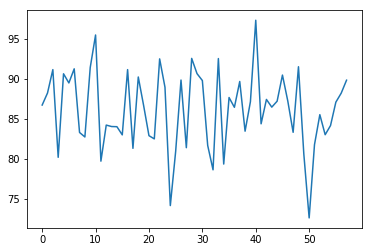

generation 58
[121.  66.  70.  62.  74. 162.  83.  76. 109.  82.  48. 111. 143.  59.
  64.  73. 100.  93. 114. 100. 127.  61.  74.  76. 103.  48.  81.  86.
 126.  73.  53. 118.  62.  63. 138.  60.  83.  74.  60. 101.  56.  79.
  84.  95.  72.  42. 181.  87.  97.  69.]
La moyenne du fitness sur cette génération est 86.78


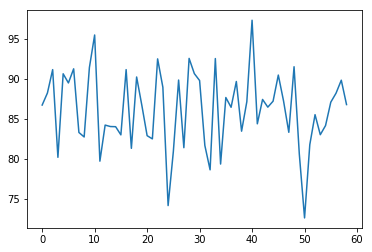

generation 59
[ 53.  85. 141. 125.  55.  34.  80.  85.  37.  92. 110.  81. 120.  68.
  71.  73.  76.  89. 141.  87.  88.  60.  73.  81.  88. 100.  37.  65.
  52. 119.  75.  64.  68. 168.  71.  89.  47.  30.  68. 111. 166. 111.
  70.  94.  73.  81.  83.  71. 101.  69.]
La moyenne du fitness sur cette génération est 83.52


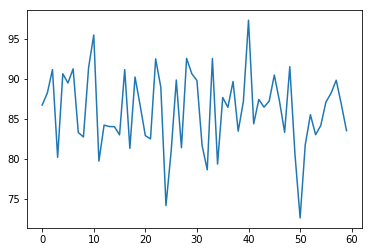

generation 60
[ 74. 123.  58.  73.  80.  92.  65.  90.  76.  74.  51.  30. 137.  88.
  70.  63. 131.  62. 114.  96.  56.  72.  80. 116.  98.  84.  70.  83.
  53. 172. 135.  82.  85. 102.  96.  90.  74.  88.  54. 167.  68.  57.
  80. 107.  87.  90. 119. 111.  39.  78.]
La moyenne du fitness sur cette génération est 86.8


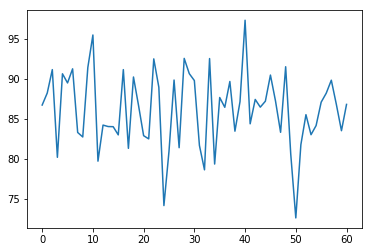

generation 61
[132.  61.  65.  86.  65.  85. 111.  97. 165.  96.  57.  74. 139.  59.
  45.  73.  74.  88.  93. 102. 102.  48. 104. 178.  96.  64.  62. 102.
  83.  41.  53. 138.  63.  74.  58.  92.  85.  93.  67.  76.  44.  75.
  38. 120.  90.  76.  91. 138.  89.  40.]
La moyenne du fitness sur cette génération est 84.94


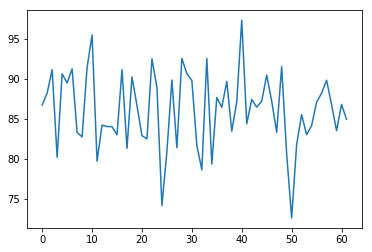

generation 62
[ 40.  71.  49. 134.  70.  62. 104.  81.  84. 127. 105.  57. 149. 112.
  71. 101. 184.  53.  49. 105.  85. 162.  98. 127. 127. 131. 197.  69.
  76.  63.  56.  61.  84.  37.  66.  73.  35. 112. 119.  63.  67.  70.
 119.  63. 106.  79.  61. 117.  85. 114.]
La moyenne du fitness sur cette génération est 90.6


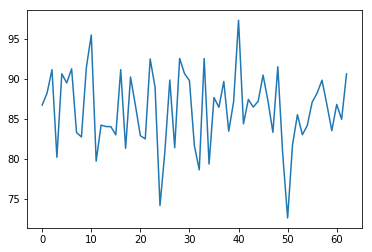

generation 63
[ 78.  84.  54.  92.  53.  70.  88.  56.  52.  52.  84.  89.  26.  89.
 139.  68. 108.  92.  35.  62.  94. 141.  62.  87.  94.  48.  69. 144.
 119.  52.  93.  93.  98.  40. 118.  69.  54.  79.  63.  66. 102. 158.
 119.  48.  57.  85.  82.  89. 123.  71.]
La moyenne du fitness sur cette génération est 81.76


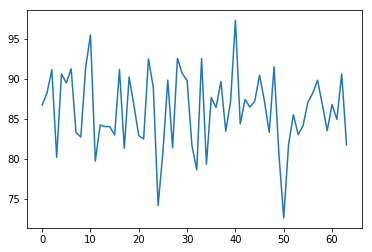

generation 64
[ 70.  86.  88.  54.  71.  66. 102.  75.  66.  71.  37.  49.  99.  83.
  81. 114.  42.  96.  71. 114. 112.  75. 115.  58. 109.  71.  68.  45.
  50.  81.  73. 118.  72.  63.  45.  72.  61. 103.  41.  78.  50.  65.
  84.  94. 173.  91. 126.  51.  73. 136.]
La moyenne du fitness sur cette génération est 79.76


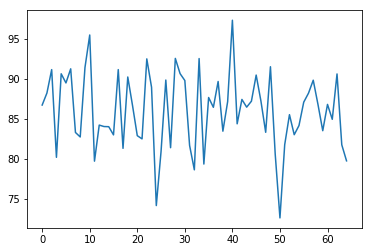

generation 65
[124. 116.  90.  94.  69. 100.  88.  88.  96.  51.  41.  85. 100. 103.
 144.  67.  52. 121.  65.  68.  63.  90.  99.  98. 112. 123.  65. 129.
  53. 103. 104.  99.  75.  64.  79.  69. 114.  86. 109. 100.  36.  80.
  70.  87. 111.  71. 117.  71.  74.  57.]
La moyenne du fitness sur cette génération est 87.4


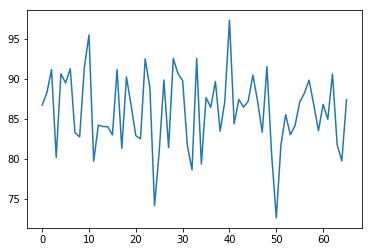

generation 66
[ 78. 100.  82. 136.  77.  78. 123.  82.  81.  35.  46. 170.  82. 103.
  74.  75.  80.  49. 120.  74.  84.  73. 124.  81. 119.  64. 126.  47.
 108. 123.  84.  80.  76.  99.  71.  56.  54. 102.  66.  68.  88.  67.
  84. 101.  83.  81.  58.  73.  64. 121.]
La moyenne du fitness sur cette génération est 85.4


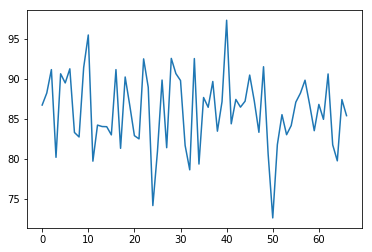

generation 67
[ 53.  47.  92.  83.  65. 105.  96. 105.  63.  70. 119.  69.  69. 115.
  88.  78.  67. 146.  78.  67.  63.  94.  63. 162.  65.  45.  93. 124.
 104. 103. 114. 122. 112.  39.  51.  54. 107. 106.  84.  96.  81.  97.
  56.  93. 104.  68.  33.  83.  88.  67.]
La moyenne du fitness sur cette génération est 84.92


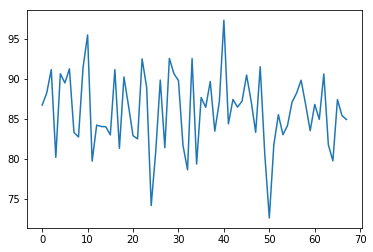

generation 68
[ 88.  55.  81.  90.  84. 112.  35. 173. 103. 201. 115. 127.  30.  95.
  70.  30.  82.  87.  47. 105.  61.  66. 146.  40.  70.  55.  56.  94.
  76.  53. 103.  56.  77.  71.  60.  83.  94.  66.  87.  88. 119.  62.
  94.  68.  55.  68. 121.  81. 116.  63.]
La moyenne du fitness sur cette génération est 83.18


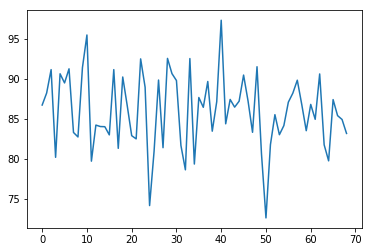

generation 69
[ 82.  86.  71. 133.  93.  60. 125. 141. 121. 140. 121.  92.  97.  31.
  90. 111.  46.  98. 125.  79.  67. 129.  71.  97.  83. 116. 180.  54.
  50. 114.  82. 117. 121.  93.  75. 128.  66.  71.  79.  90.  85.  91.
  82.  33.  92. 106.  57.  61.  77.  70.]
La moyenne du fitness sur cette génération est 91.58


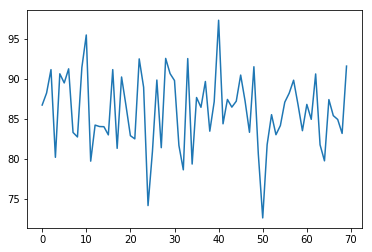

generation 70
[113.  63.  91.  83. 115. 104.  41.  70.  40. 112. 127. 104.  67.  57.
 124. 104. 122.  73.  65.  74.  46.  74. 119.  70. 111. 133.  76.  92.
  52. 114. 122.  47.  45.  97.  68. 119. 114.  71.  73.  66.  85.  56.
  44.  52. 126.  88. 129. 101.  72.  71.]
La moyenne du fitness sur cette génération est 85.64


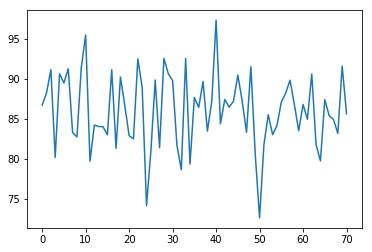

generation 71
[ 92.  57.  73.  97.  87.  61.  83.  59.  54. 119.  70. 118. 174.  90.
  56.  51.  83.  77. 130. 106. 113.  90. 106.  85. 121.  43.  29. 123.
 124.  73. 111.  35.  94.  31. 109.  60.  49.  65.  93. 181. 101.  68.
  77.  45.  86. 107.  60.  59.  35.  64.]
La moyenne du fitness sur cette génération est 83.48


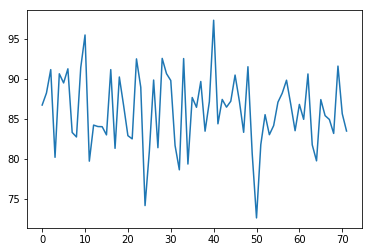

generation 72
[ 56.  45. 134.  73. 102.  67.  71.  54.  65. 125.  71.  76.  78.  50.
  77. 120.  58.  66. 135.  37.  77.  78.  78.  48.  87.  94. 148.  68.
  77.  80. 128.  84.  76.  77.  97.  78.  87.  85.  77.  77.  60.  89.
  94. 131.  63.  40.  42.  52. 225.  67.]
La moyenne du fitness sur cette génération est 82.48


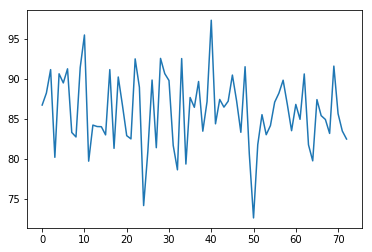

generation 73
[119.  98. 109.  65.  59.  80. 149. 135.  76.  80.  67.  77. 110.  88.
 126.  81.  77. 105. 111. 122. 142. 101. 109.  97.  90.  52.  61.  31.
  90.  86. 122. 119. 104. 192.  69.  93.  86.  37. 100. 183.  67.  74.
  77.  71. 118.  62.  86.  81.  74.  86.]
La moyenne du fitness sur cette génération est 93.88


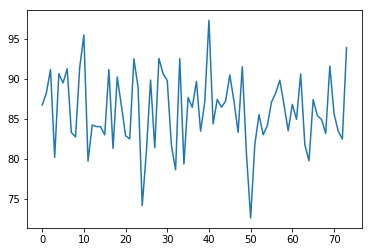

KeyboardInterrupt: 

In [21]:
one_plus_one(nb_gen, mutation_rate)